What we are covering:
1. Data (Prepare and load)
2. Build Model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

In [2]:
import torch
import torch.nn as nn # nn contains all the building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0'

**1. Data (Prepare and load)**

Machine learning is a game of two parts:
1. Get data into a model
2. Build a model to learn patterns in the data



Creating known data using the linear regression formula, using the formula y = weight * X + bias to make a straight line with known parameters.


In [6]:
weight = 0.6
bias = 0.

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0000],
         [0.0120],
         [0.0240],
         [0.0360],
         [0.0480],
         [0.0600],
         [0.0720],
         [0.0840],
         [0.0960],
         [0.1080]]),
 50,
 50)

*Splitting data into training and test sets*

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

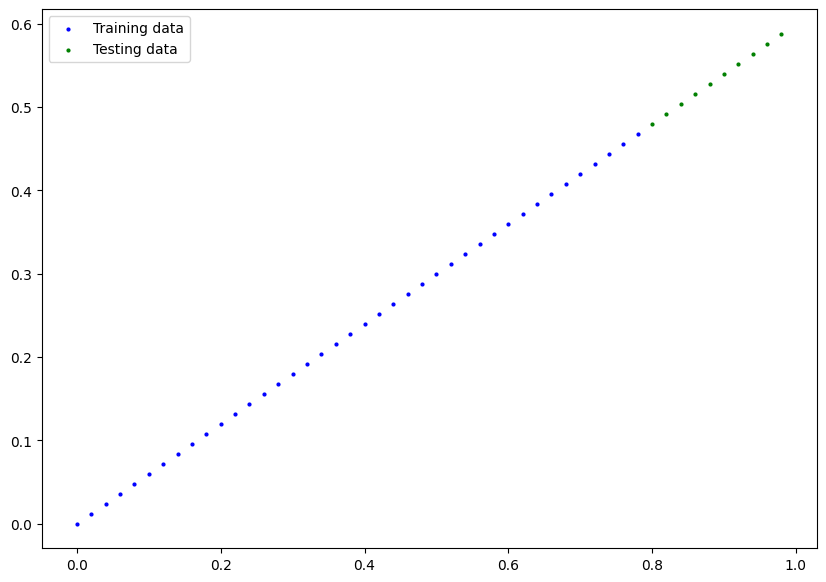

In [11]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 10})

plot_predictions()

**2. Build Model**

What our model does:
1. Starts with random values (weight and bias)
2. Looks at training data and adjusts the random values to try and match the ideal values

How does it learn? Two algorithms:
1. Gradient Descent
2. Backpropagation











In [15]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

# Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear Regression Formula

# Create a random seed
torch.manual_seed(42)
        